### Union-Find 알고리즘

#### 1. 정의
- 그래프 알고리즘으로 두 노드가 같은 그래프에 속하는지 판별하는 알고리즘
- 노드를 합치는 Union 연산과 루트 노드를 찾는 Find 연산으로 이루어짐.
- '합집합 찾기' , '서로소 집합(Disjoint-Set)' 알고리즘이라고 부름. 

#### 2. 그림을 통해 알아보기
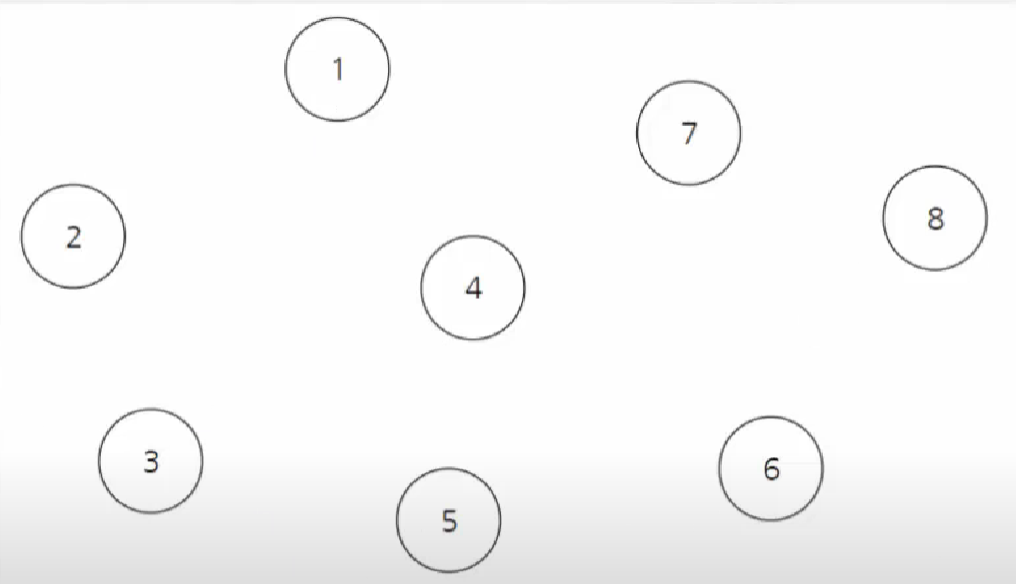

- 만약 1-2-3 노드가 연결되어 있을 때
__Union__ (합침) : 부모를 합칠 때는 일반적으로 더 작은 값으로 합침

|노드번호|1|2|3|4|5|6|7|8|
|---|---|--|--|--|--|--|--|--|
|부모노드번호|1|1|2|4|5|6|7|8|

이때, 3번 노드의 부모노드번호는 사실상 1 -> __Find__ : 재귀함수를 사용해 두개의 노드의 부모노드를 확인하여 현재 같은 집합에 속하는지 확인


### 3. 코드로 구현하기

In [ ]:
# 각 노드의 부모를 담는다. 
# - par의 각 인덱스는 각 노드의 번호이고, 값은 부모 노드를 의미.
N = 8
par = [-1 for i in range(N+1)]   # -1(아직 부모가 정해지지않음) 으로 배열 초기화

# 입력값 x 는 인덱스의 번호 = 즉, 노드의 번호.
# 출력값 par[x]는 부모노드 번호

# find 알고리즘
def find(x):
    # 만약 부모노드가 없다면 x 자체가 부모임.
    if par[x]<0:
        return x
    
    par[x] = find(x)
    return par[x]

# 입력값 i, j는 인덱스의 번호 = 즉, 노드의 번호
# 출력값 False True는 합치지x,합치기를 의미

# union 알고리즘
def union(i,j):
    a, b = find(i), find(j)
    # 만약 부모 노드 번호가 같다면 이미 연결되어 있음.
    if a == b:
        return False

    # 부모 노드를 통일시킴.
    par[j] = a
    return True 

[-1, -1, -1, -1, -1, -1, -1, -1, -1]


***********
Spanning Tree 알고리즘

### 1. 정의
- 그래프의 모든 노들을 포함하는 트리 (그래프의 `최소 연결 부분 그래프`로 사이클이 없음)
- 노드의 개수 n개이면, 간선의 개수는 n-1개
- 하나의 그래프에 많은 신장 트리가 존재함.
-  DFS, BFS을 이용하여 그래프에서 신장 트리를 찾을 수 있음.

### 2. 그림을 통해 알아보기
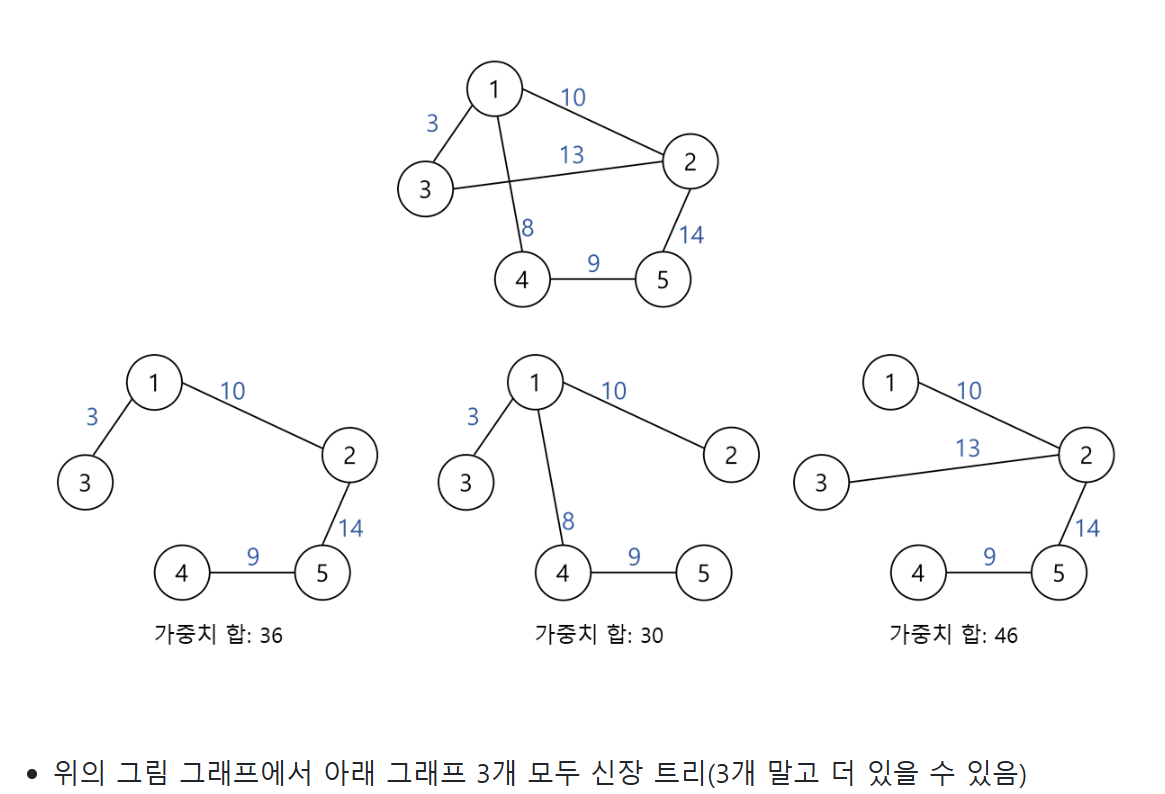

#### 최소신장트리(MST:Minimum Spanning Tree)
- 최소신장트리 : 신장 트리 중 `간선의 가중치 합이 최소 = 최소 비용`
    - ex. 도시마다 도로를 짓는데 최소 거리가 되도록 구축.

- 최소신장트리 구현방법
    1) Krustal MST 알고리즘
        - greedy method을 이용하여 `모든 노드를 최소 비용으로 연결`하는 최적 해답을 구함.
        - 과정
            1. 그래프의 간선들을 가중치의 오름차순으로 정렬
            2. 정렬된 간선 리스트에서 순서대로 사이클을 형성하지 않는 간선을 선택
                - 즉, 가장 낮은 가중치를 먼저 선택 + 사이클을 형성하는 간선을 제외
            3. 해당 간선을 현재의 MST의 집합에 추가

    2) Prim MST 알고리즘
        - 시작 노드에서부터 출발하여 신장트리 집합을 단계적으로 확장해나가는 방법
            - 노드 선택을 기반으로 하는 알고리즘.
            - 이전단계에서 만들어진 신장 트리를 확장하는 방법
        - 과정
            1. 시작 단계에서는 시작 노드만이 MST 집합에 포함
            2. 앞단계에서 만들어진 MST집합에 인접한 노드들 중에서 최소 간선으로 연결된 노드를 선택하여 트리를 확장
                - 즉, 가장 낮은 가중치를 먼저 선택
            3. 위의 과정을 트리가 N-1개의 간선을 가질때까지 반복

********************
### 관련문제 : 
- https://www.acmicpc.net/problem/1647

#### 문제
동물원에서 막 탈출한 원숭이 한 마리가 세상구경을 하고 있다. 그러다가 평화로운 마을에 가게 되었는데, 그곳에서는 알 수 없는 일이 벌어지고 있었다.

마을은 N개의 집과 그 집들을 연결하는 M개의 길로 이루어져 있다. 길은 어느 방향으로든지 다닐 수 있는 편리한 길이다. 그리고 각 길마다 길을 유지하는데 드는 유지비가 있다. 임의의 두 집 사이에 경로가 항상 존재한다.

마을의 이장은 마을을 두 개의 분리된 마을로 분할할 계획을 가지고 있다. 마을이 너무 커서 혼자서는 관리할 수 없기 때문이다. 마을을 분할할 때는 각 분리된 마을 안에 집들이 서로 연결되도록 분할해야 한다. 각 분리된 마을 안에 있는 임의의 두 집 사이에 경로가 항상 존재해야 한다는 뜻이다. 마을에는 집이 하나 이상 있어야 한다.

그렇게 마을의 이장은 계획을 세우다가 마을 안에 길이 너무 많다는 생각을 하게 되었다. 일단 분리된 두 마을 사이에 있는 길들은 필요가 없으므로 없앨 수 있다. 그리고 각 분리된 마을 안에서도 임의의 두 집 사이에 경로가 항상 존재하게 하면서 길을 더 없앨 수 있다. 마을의 이장은 위 조건을 만족하도록 길들을 모두 없애고 나머지 길의 유지비의 합을 최소로 하고 싶다. 이것을 구하는 프로그램을 작성하시오.

#### 입력
첫째 줄에 집의 개수 N, 길의 개수 M이 주어진다. N은 2이상 100,000이하인 정수이고, M은 1이상 1,000,000이하인 정수이다. 그 다음 줄부터 M줄에 걸쳐 길의 정보가 A B C 세 개의 정수로 주어지는데 A번 집과 B번 집을 연결하는 길의 유지비가 C (1 ≤ C ≤ 1,000)라는 뜻이다.

임의의 두 집 사이에 경로가 항상 존재하는 입력만 주어진다.

#### 출력
첫째 줄에 없애고 남은 길 유지비의 합의 최솟값을 출력한다.


##### 아이디어
1. 유지비의 합이 최소로 만들기 위해선 `최소신장트리` 알고리즘 이용.
2. __최소신장트리 만든 후__, 가장 유지비가 큰 간선을 제거
3. 두 개의 마을로 나눈다는 것은, 두 개의 서로 다른 부모의 노드를 갖고 있는 집합이 존재함.


##### 풀이 과정
1. 최소신장트리를 만든다.
    - 구현방법: Krustal : 가중치(간선)을 기준으로 오름차순 정렬
2. 유지비가 큰 간선을 제거한다. 

In [ ]:
# 입력값
N, M = list(map(int, input().split()))

graphs = []
for _ in range(M):
    a, b, c = list(map(int, input().split()))
    graphs.append((a,b,c))


# 최소신장트리 (krustal 알고리즘)
# 1. union-find알고리즘 (find:부모노드를 찾음, union:두 노드를 병합)
def find(parent, x):
    if parent[x] != x:
        parent[x] = find(parent, parent[x])  # 재귀방법 -> 부모노드가 노드의 값으로 
    return parent[x]

def union(parent, a, b):   # 더 작은 값으로 부모노드를 결정한다.
    a_root = find(parent, a)
    b_root = find(parent, b)
    if a_root < b_root:
        parent[b_root] = a_root
    else:
        parent[a_root] = b_root

graphs.sort(key=lambda x:x[2])
    

In [2]:
li = [(1,2,3), (1,3,2), (3,4,4)]

li.sort(key=lambda x : x[2])
li

[(1, 3, 2), (1, 2, 3), (3, 4, 4)]